# Figure 8: Equitable carbon allocations

In [1]:
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
sns.set_style('whitegrid')

# Read in data

In [2]:
data = pd.read_excel(
    'fig5_col1_data.xlsx',
    index_col=[0,1]
)

In [3]:
data.region.unique()

array(['Africa', 'China', 'Asia', 'Developed', 'Latin'], dtype=object)

In [4]:
data['region'] = data['region'].apply(
    lambda x: x.replace('Latin','Latin America')
)
data.region.unique()

array(['Africa', 'China', 'Asia', 'Developed', 'Latin America'],
      dtype=object)

In [5]:
data.head()

,,scenario,region,consideration,Emissions|CO2,Emissions|CO2|Fair,unit,Temperature,DAC,Technoeconomic,Diffusion,Governance,Governance SSP,delta
,model,,,,,,,,,,,,,
0,GENIE_SSP2_v4.1.7,EN_NPi2020-DACm-MP-median-stor3-final_1000,Africa,net-zero,168.342207,216.599511,Gt CO2,C3 with DAC,DAC Included,Medium,Medium,Unconstrained Governance,NaN,48.257304
1,GENIE_SSP2_v4.1.7,EN_NPi2020-DACm-MP-median-stor3-final_1000,Africa,net-zero-including-debt,168.342207,274.798539,Gt CO2,C3 with DAC,DAC Included,Medium,Medium,Unconstrained Governance,NaN,106.456332
2,GENIE_SSP2_v4.1.7,EN_NPi2020-DACm-MP-median-stor3-final_1000,China,net-zero,217.808799,165.846347,Gt CO2,C3 with DAC,DAC Included,Medium,Medium,Unconstrained Governance,NaN,-51.962452
3,GENIE_SSP2_v4.1.7,EN_NPi2020-DACm-MP-median-stor3-final_1000,China,net-zero-including-debt,217.808799,211.060488,Gt CO2,C3 with DAC,DAC Included,Medium,Medium,Unconstrained Governance,NaN,-6.748311
4,GENIE_SSP2_v4.1.7,EN_NPi2020-DACm-MP-median-stor3-final_1000,Asia,net-zero,234.390778,310.442610,Gt CO2,C3 with DAC,DAC Included,Medium,Medium,Unconstrained Governance,NaN,76.051832


# Plot

In [6]:
scens_per_row = {
    'C1':['C1 without DAC', 'C1 with DAC'],
    'C2':['C2 without DAC', 'C2 with DAC', 'C2 with DAC and Governance SSP1'],
    'C3':['C3 without DAC', 'C3 with DAC', 'C3 with DAC and Governance SSP2']
}

Define color maps.

In [17]:
colors = ['#d35f27', '#0773b2', '#cc79a7', '#5cb4e4'] # without DAC, with DAC, governance SSP1, governance SSP2
hatch_styles = [None, '//']
labels = {
    'C1':['No DAC', 'DAC'],
    'C2':['No DAC', 'DAC', 'DAC and\nGovernance'],
    'C3':['No DAC','DAC','DAC and\nGovernance']
}
region_titles = {
    'Developed': 'Developed Regions',
    'Latin America': 'Latin America and the Caribbean',
    'Africa': 'Middle East and Africa',
    'China': 'China and Centrally Planned Asia',
    'Asia': 'South and South East Asia'
}

In [8]:
plt.rcParams.update({'font.size': 19})

In [9]:
def plot_per_region_climate(ax, region, category):
    for i,scen in enumerate(scens_per_row[category]):
        plot_data = data[(data['Temperature']==scen) & (data['region']==region)]
        for j,consideration in enumerate(['net-zero', 'net-zero-including-debt']):
            plot_data_consideration = plot_data[plot_data['consideration']==consideration]
            if j==0:
                x=i-0.2
            else:
                x=i+0.2

            ax.bar(
                x=x,
                height=plot_data_consideration['delta'],
                width=0.2,
                color=colors[i],
                hatch=hatch_styles[j]
            )
            ax.axhline(0, color='black')
    # Add shading for areas of plot
    # Get the minimum and maximum plot limits? And then decide shading.

    #ax.fill_between(x=[-0.5,x+0.5], color='red', y1=100, y2=400, alpha=0.1)
    #ax.fill_between(x=[-0.5,x+0.5], color='yellow', y1=0, y2=100, alpha=0.1)
    #ax.fill_between(x=[-0.5,x+0.5], color='grey', y1=-150, y2=0, alpha=0.1)
    ax.set_xlim(-0.4,x+0.4)
    ax.set_xticks(range(int(x+1)))
    ax.set_xticklabels(labels[category])

C:\Users\gidden\AppData\Local\Temp\ipykernel_28784\2480917234.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(color='grey', edgecolor='grey', alpha=0.3, label='Equal per capita'),
C:\Users\gidden\AppData\Local\Temp\ipykernel_28784\2480917234.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(color='grey', edgecolor='grey', alpha=0.3, hatch = '///', label='Equal per capita (with carbon debt)'),
C:\Users\gidden\AppData\Local\Temp\ipykernel_28784\2480917234.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(color='red', edgecolor='red', alpha=0.3, label='Cost-effective output exceeds than fair share'),
C:\Users\gidden\AppData\Local\Temp\ipykernel_28784\2480917234.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(color='yellow', edgecolor='yellow', alpha

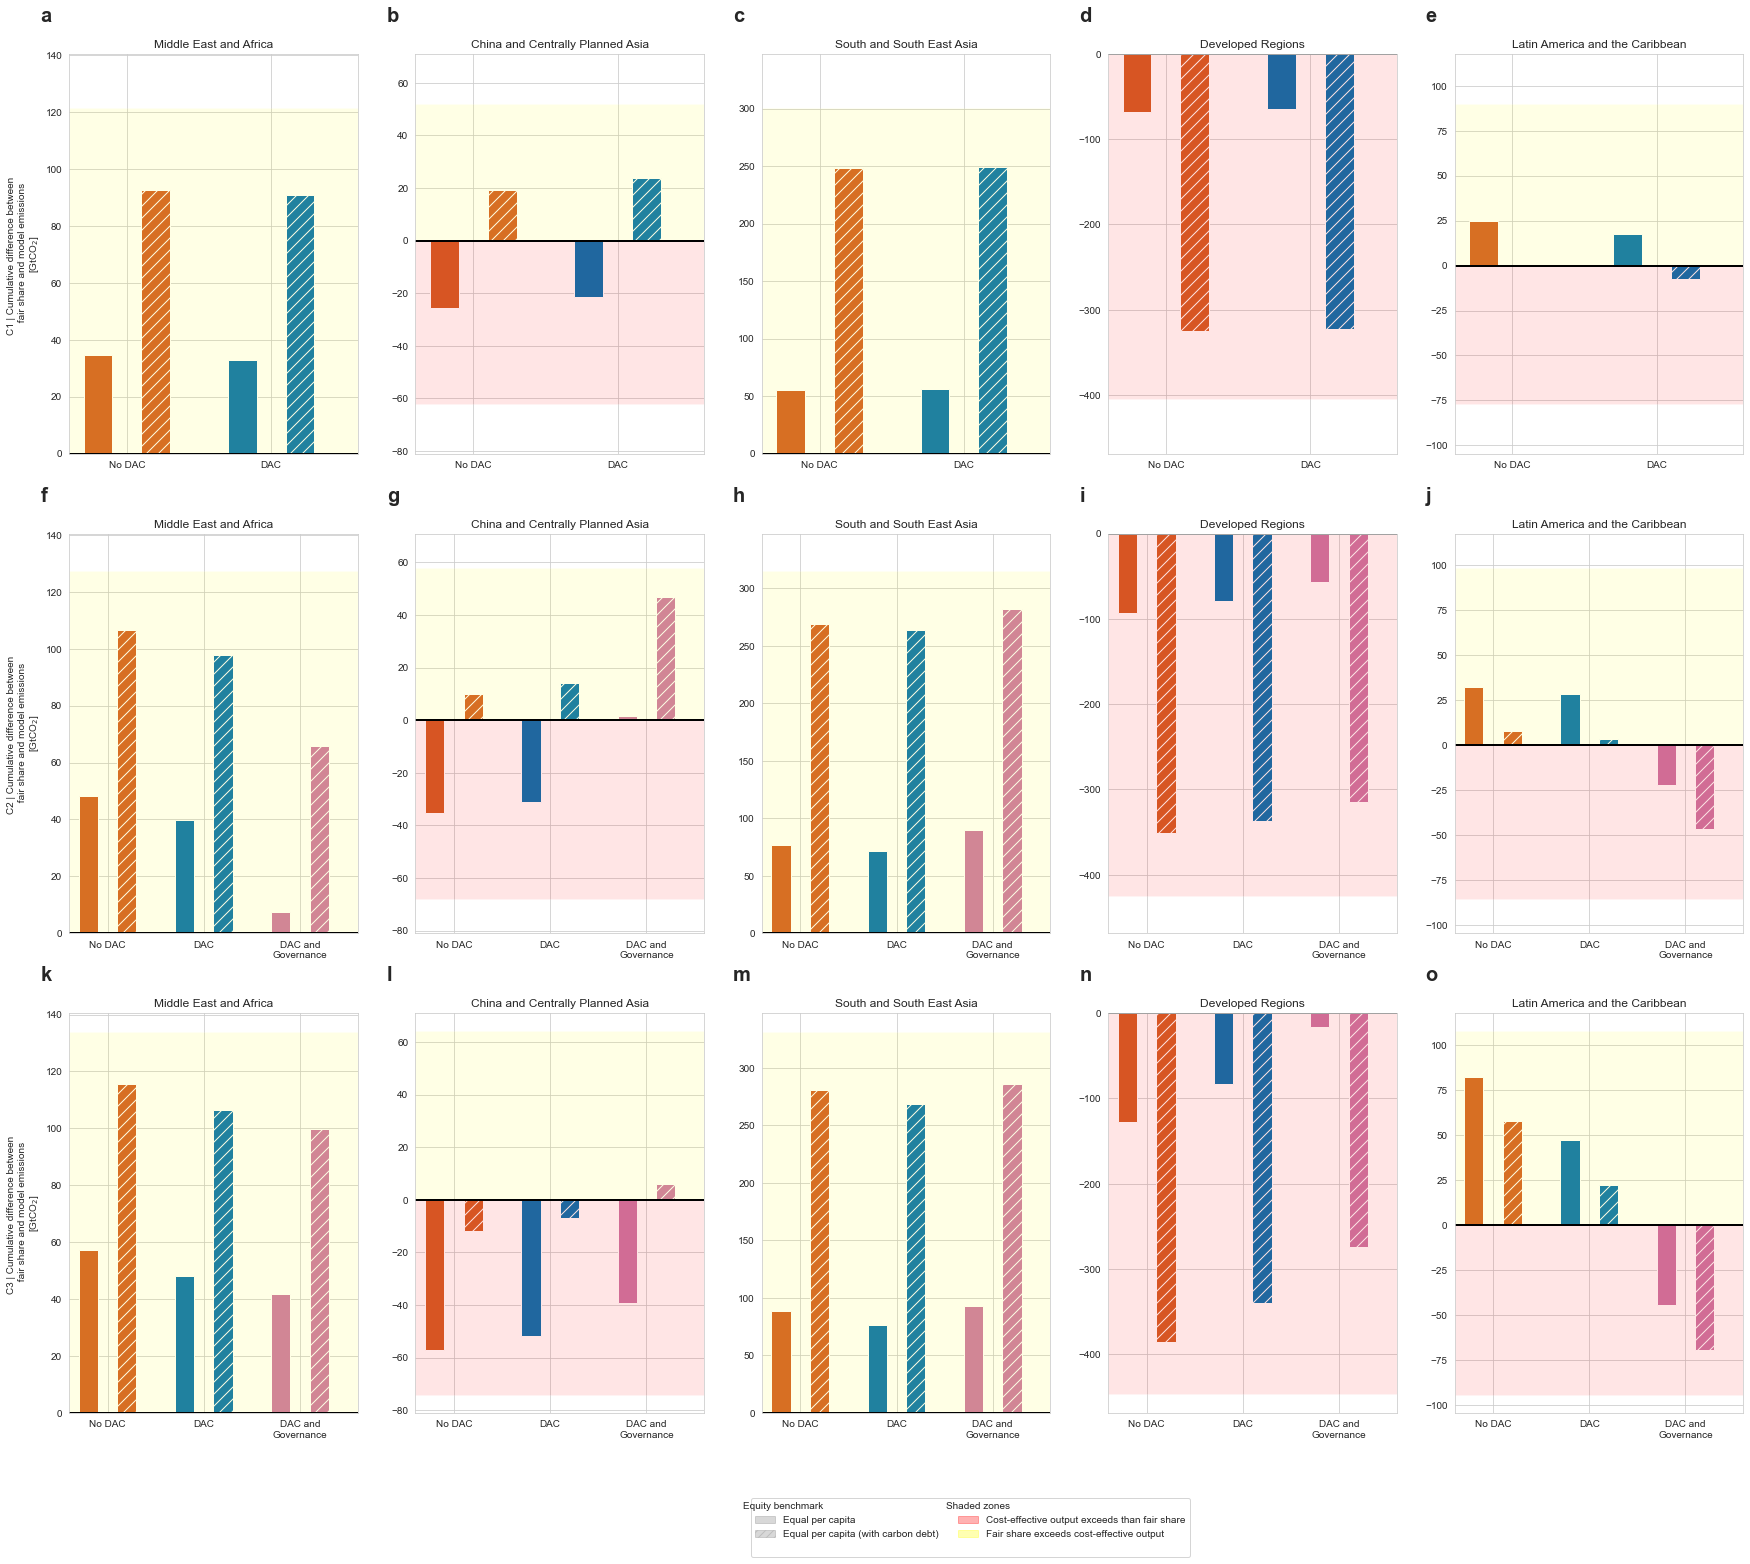

In [18]:
fig,ax = plt.subplots(3,5, sharey='col', figsize=(30,25))

for i,climate in enumerate(['C1', 'C2', 'C3']):
    for j, region in enumerate(data['region'].unique()):
        plot_per_region_climate(ax[i,j],region,climate)
        ax[i,j].set_title(region_titles[region])
        #ax[i,j].set_ylim(-150,400)

for i,climate in enumerate(['C1', 'C2', 'C3']):
    for j, region in enumerate(data['region'].unique()):
        xmin, xmax = ax[i,j].get_xlim()
        ymin, ymax = ax[i,j].get_ylim()
        if ymin < 0:
            ax[i,j].axhspan(facecolor='red', ymin=ymin, ymax=0, alpha=0.1)
        if ymax > 0:
            ax[i,j].axhspan(facecolor='yellow', ymin=0, ymax=ymax, alpha=0.1)
ylabels = [
    'C1 | Cumulative difference between \n fair share and model emissions\n[GtCO$_2$]',
    'C2 | Cumulative difference between \n fair share and model emissions\n[GtCO$_2$]',
    'C3 | Cumulative difference between \n fair share and model emissions\n[GtCO$_2$]',
]
for i in range(3):
    ax[i,0].set_ylabel(ylabels[i])

# Compose a custom legend
legend_handles = [
    Line2D([],[], color='none', label='Equity benchmark'),
    Patch(color='grey', edgecolor='grey', alpha=0.3, label='Equal per capita'),
    Patch(color='grey', edgecolor='grey', alpha=0.3, hatch = '///', label='Equal per capita (with carbon debt)'),
    Line2D([],[], color='none', label=''),
    Line2D([],[], color='none', label='Shaded zones'),
    Patch(color='red', edgecolor='red', alpha=0.3, label='Cost-effective output exceeds than fair share'),
    Patch(color='yellow', edgecolor='yellow', alpha=0.3, label='Fair share exceeds cost-effective output'),
]
leg = ax[2,2].legend(handles=legend_handles, bbox_to_anchor=(1.5, -0.2), ncol=2)

# Thanks: https://stackoverflow.com/questions/24787041/multiple-titles-in-legend-in-matplotlib 
for item, label in zip(leg.legendHandles, leg.texts):
    if label._text  in ['Equity benchmark', 'Shaded zones']:
        width=item.get_window_extent(fig.canvas.get_renderer()).width
        label.set_ha('left')
        label.set_position((-2*width,0))

# Add figure labels
axs = ax.flat
for n,ax in enumerate(axs):
    ax.text(-0.1, 1.08, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

In [11]:
fig.savefig(
    '../files/fig8.svg',
    bbox_inches='tight',
    dpi=650
)

Analysis for the main text to illustrate results.

First, we look into the developing regions.

In [12]:
data_developed = data[data['region']=='Developed']

In [13]:
table_all_countries = (
    data
    .groupby(['region', 'Temperature', 'consideration'])
    [['Emissions|CO2', 'Emissions|CO2|Fair','delta']]
    .describe()
    .loc[:,pd.IndexSlice[:,'mean']]
    .unstack()
    .reorder_levels(order=[2,0,1], axis=1)
    .sort_index(axis=1)
    .sort_index(axis=0)
    .round(0)
)

In [14]:
table_all_countries

consideration                                      net-zero  \
                                              Emissions|CO2   
                                                       mean   
region        Temperature                                     
Africa        C1 with DAC                              64.0   
              C1 without DAC                           62.0   
              C2 with DAC                             103.0   
              C2 with DAC and Governance SSP1         134.0   
              C2 without DAC                           95.0   
              C3 with DAC                             168.0   
              C3 with DAC and Governance SSP1         182.0   
              C3 with DAC and Governance SSP2         174.0   
              C3 with Governance SSP1                 170.0   
              C3 with Governance SSP2                 188.0   
              C3 without DAC                          162.0   
Asia          C1 with DAC                              91.0   
              C1 without DAC                           91.0   
              C2 with DAC                             140.0   
              C2 with DAC and Governance SSP1         122.0   
              C2 without DAC                          135.0   
              C3 with DAC                             234.0   
              C3 with DAC and Governance SSP1         209.0   
              C3 with DAC and Governance SSP2         217.0   
              C3 with Governance SSP1                 187.0   
              C3 with Governance SSP2                 203.0   
              C3 without DAC                          225.0   
China         C1 with DAC                             105.0   
              C1 without DAC                          109.0   
              C2 with DAC                             148.0   
              C2 with DAC and Governance SSP1         116.0   
              C2 without DAC                          152.0   
              C3 with DAC                             218.0   
              C3 with DAC and Governance SSP1         193.0   
              C3 with DAC and Governance SSP2         205.0   
              C3 with Governance SSP1                 198.0   
              C3 with Governance SSP2                 208.0   
              C3 without DAC                          223.0   
Developed     C1 with DAC                             147.0   
              C1 without DAC                          150.0   
              C2 with DAC                             196.0   
              C2 with DAC and Governance SSP1         173.0   
              C2 without DAC                          209.0   
              C3 with DAC                             251.0   
              C3 with DAC and Governance SSP1         246.0   
              C3 with DAC and Governance SSP2         184.0   
              C3 with Governance SSP1                 286.0   
              C3 with Governance SSP2                 210.0   
              C3 without DAC                          297.0   
Latin America C1 with DAC                              20.0   
              C1 without DAC                           13.0   
              C2 with DAC                              25.0   
              C2 with DAC and Governance SSP1          75.0   
              C2 without DAC                           21.0   
              C3 with DAC                              30.0   
              C3 with DAC and Governance SSP1          66.0   
              C3 with DAC and Governance SSP2         122.0   
              C3 with Governance SSP1                  67.0   
              C3 with Governance SSP2                 117.0   
              C3 without DAC                           -4.0   

consideration                                                            \
                                              Emissions|CO2|Fair  delta   
                                                            mean   mean   
region        Temperature                                

In [15]:
table_all_countries.to_excel('table_all_countries.xlsx')

For the C1 pathways:
* No real influence of DAC inclusion on the fair share outcomes except for the Latin America region.
* For a region like China and Latin America, the type of equity benchmark matters to identify fairness of output.
* The large relative shift hides a relatively small cumulative emission difference (7 Gt CO2) over a period of 30 years.

For the C2 pathways:
* Small influence with DAC inclusion (4% closer to fair benchmark 1, and 5% closer to benchmark 2)
* Larger influence with DAC and governance (nearly 12% closer to fairer outcomes)
* Interpretation = lower reliance on international transfers to achieve fair outcomes

For the C3 pathways:
* Slightly larger influence of DAC influence compared to C3 - does this mean that a greater C budget increases space for tech portfolio and governance to get closer to fair outcomes?
* Also important to note the role of the equity benchmark - when you're net-negative in equity space, this still implies very large transfers!